In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import metrics

In [2]:
df = pd.read_csv('/content/drive/MyDrive/supply_train.csv')
test = pd.read_csv('/content/drive/MyDrive/supply_test.csv')

In [3]:
df.shape

(16620, 25)

In [4]:
test.shape

(5529, 25)

In [5]:
df = df.drop(columns = ['Unnamed: 0','Ware_house_ID', 'WH_Manager_ID'])

In [6]:
test = test.drop(columns = ['Unnamed: 0','Ware_house_ID', 'WH_Manager_ID'])

In [7]:
df.shape

(16620, 22)

In [8]:
test.shape

(5529, 22)

In [9]:
df.duplicated().sum()
test.duplicated().sum()

0

In [10]:
df.isna().sum()
print("----")
test.isna().sum()

----


Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [11]:
df.isna().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [12]:
test['workers_num'].fillna(value =test['workers_num'].mean(),inplace=True)

In [13]:
df['workers_num'].fillna(value =test['workers_num'].mean(),inplace=True)

In [14]:
test['wh_est_year'].fillna(value =test['wh_est_year'].mean(),inplace=True)

In [15]:
df['wh_est_year'].fillna(value =test['wh_est_year'].mean(),inplace=True)

In [16]:
test['approved_wh_govt_certificate'].value_counts()

C     1220
B+    1061
B     1049
A     1026
A+     967
Name: approved_wh_govt_certificate, dtype: int64

In [17]:
df['approved_wh_govt_certificate'].value_counts()

C     3638
B+    3260
B     3220
A     3132
A+    2771
Name: approved_wh_govt_certificate, dtype: int64

In [18]:
test['approved_wh_govt_certificate'].fillna(value='C',inplace=True)

In [19]:
df['approved_wh_govt_certificate'].fillna(value='C',inplace=True)

In [20]:
df.isna().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [21]:
test.isna().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [22]:
#Training dataset
X = df.drop(columns='product_wg_ton')
y = df['product_wg_ton']

In [23]:
#Testdata
Xt = test.drop(columns='product_wg_ton')
yt = test['product_wg_ton']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')

In [26]:
scaler = StandardScaler()
ohe = OneHotEncoder()
impute_median = SimpleImputer(strategy='median')
impute_freq = SimpleImputer(strategy='most_frequent')

In [27]:
# Make pipeline
num_pipe = make_pipeline(impute_median, scaler)
cat_pipe = make_pipeline(impute_freq, ohe)

In [28]:
# Set tuple
num_tup = (num_pipe, num_cols)
cat_tup = (cat_pipe, cat_cols)

In [29]:
col_tf = make_column_transformer(num_tup, cat_tup, remainder='passthrough')

In [30]:
X_train_processed = col_tf.fit(X_train)

In [31]:
# Extract the feature names from one hot encoder
cat_feature_names = col_tf.named_transformers_['pipeline-2']\
                              .named_steps['onehotencoder']\
                              .get_feature_names_out(cat_cols(X_train))

cat_feature_names

array(['Location_type_Rural', 'Location_type_Urban',
       'WH_capacity_size_Large', 'WH_capacity_size_Mid',
       'WH_capacity_size_Small', 'zone_East', 'zone_North', 'zone_South',
       'zone_West', 'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Company Owned', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_A',
       'approved_wh_govt_certificate_A+',
       'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C'], dtype=object)

In [32]:
final_cols = num_cols(X_train) + list(cat_feature_names)
final_cols

['num_refill_req_l3m',
 'transport_issue_l1y',
 'Competitor_in_mkt',
 'retail_shop_num',
 'distributor_num',
 'flood_impacted',
 'flood_proof',
 'electric_supply',
 'dist_from_hub',
 'workers_num',
 'wh_est_year',
 'storage_issue_reported_l3m',
 'temp_reg_mach',
 'wh_breakdown_l3m',
 'govt_check_l3m',
 'Location_type_Rural',
 'Location_type_Urban',
 'WH_capacity_size_Large',
 'WH_capacity_size_Mid',
 'WH_capacity_size_Small',
 'zone_East',
 'zone_North',
 'zone_South',
 'zone_West',
 'WH_regional_zone_Zone 1',
 'WH_regional_zone_Zone 2',
 'WH_regional_zone_Zone 3',
 'WH_regional_zone_Zone 4',
 'WH_regional_zone_Zone 5',
 'WH_regional_zone_Zone 6',
 'wh_owner_type_Company Owned',
 'wh_owner_type_Rented',
 'approved_wh_govt_certificate_A',
 'approved_wh_govt_certificate_A+',
 'approved_wh_govt_certificate_B',
 'approved_wh_govt_certificate_B+',
 'approved_wh_govt_certificate_C']

In [33]:
Xt_processed = col_tf.fit(Xt)

In [34]:
X_train_tf = col_tf.transform(X_train)
X_test_tf = col_tf.transform(X_test)

In [35]:
Xtest_tf = col_tf.transform(Xt)

In [36]:
X_train_output = pd.DataFrame(X_train_tf, columns = final_cols)
X_test_output = pd.DataFrame(X_test_tf, columns = final_cols)

In [37]:
def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)
  # print the results
  rmse
  print(f' MAE: {mae:.2f} \n MSE: {mse:.2f} \n RMSE: {rmse:.2f} \n R2_score: {r2:.2f}')

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train_tf, y_train)

LinearRegression()

In [40]:
lr_train_preds = lr.predict(X_train_tf)
lr_test_preds = lr.predict(X_test_tf)
lr_test_p =lr.predict(Xtest_tf)
Xtest_tf.dtype.names

In [41]:
print('Training Data')
eval_model(y_train, lr_train_preds)
print('\nTesting Data')
eval_model(y_test , lr_test_preds)
print('\nFor given test data')
eval_model(yt,lr_test_p)

Training Data
 MAE: 1004.58 
 MSE: 1870522.86 
 RMSE: 1367.67 
 R2_score: 0.99

Testing Data
 MAE: 1032.11 
 MSE: 2085307.87 
 RMSE: 1444.06 
 R2_score: 0.98

For given test data
 MAE: 1007.52 
 MSE: 1900505.48 
 RMSE: 1378.59 
 R2_score: 0.99


Random Forest

In [42]:
# prompt: build random forest

rf = RandomForestRegressor()
rf.fit(X_train_tf, y_train)
rf_train_preds = rf.predict(X_train_tf)
rf_test_preds = rf.predict(X_test_tf)
rf_test_p =rf.predict(Xtest_tf)
print('Training Data')
eval_model(y_train, rf_train_preds)
print('\nTesting Data')
eval_model(y_test , rf_test_preds)
print('\nFor given test data')
eval_model(yt,rf_test_p)


Training Data
 MAE: 252.64 
 MSE: 118616.03 
 RMSE: 344.41 
 R2_score: 1.00

Testing Data
 MAE: 681.05 
 MSE: 872382.14 
 RMSE: 934.01 
 R2_score: 0.99

For given test data
 MAE: 666.27 
 MSE: 804159.76 
 RMSE: 896.75 
 R2_score: 0.99


Neural Network

In [43]:
from keras import backend as K

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [44]:
model_1 = Sequential()

# Hidden layers
model_1.add(Dense(37, input_dim = X_train_tf.shape[1], activation='relu'))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(10, activation='relu'))

# Output layer
model_1.add(Dense(1, activation='linear'))

# Compile the model
model_1.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

# Fit the model
history = model_1.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs = 100,
                    batch_size = 32)

Epoch 1/100
390/390 [==============================] - 3s 4ms/step - loss: 565750848.0000 - mean_absolute_error: 20850.4609 - root_mean_squared_error: 23785.5176 - val_loss: 335095776.0000 - val_mean_absolute_error: 15412.2578 - val_root_mean_squared_error: 18305.6211
Epoch 2/100
390/390 [==============================] - 2s 4ms/step - loss: 93965936.0000 - mean_absolute_error: 7146.9072 - root_mean_squared_error: 9693.6025 - val_loss: 32869296.0000 - val_mean_absolute_error: 4561.3643 - val_root_mean_squared_error: 5733.1748
Epoch 3/100
390/390 [==============================] - 1s 3ms/step - loss: 26556980.0000 - mean_absolute_error: 4081.0430 - root_mean_squared_error: 5153.3467 - val_loss: 21127670.0000 - val_mean_absolute_error: 3645.2410 - val_root_mean_squared_error: 4596.4844
Epoch 4/100
390/390 [==============================] - 1s 3ms/step - loss: 16837674.0000 - mean_absolute_error: 3239.9783 - root_mean_squared_error: 4103.3735 - val_loss: 13000321.0000 - val_mean_absolute_

In [45]:
y_pred_train_1 = model_1.predict(X_train_tf)
y_pred_test_1 = model_1.predict(X_test_tf)
y_t = model_1.predict(Xtest_tf)

173/173 [==============================] - 0s 1ms/step


In [46]:
model_2 = Sequential()

# Hidden layers
model_2.add(Dense(37, input_dim = X_train_tf.shape[1], activation='relu'))
model_2.add(Dropout(.2))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dropout(.2))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dropout(.2))

# Output layer
model_2.add(Dense(1, activation='linear'))

# Compile the model
model_2.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

# Fit the model
history = model_2.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs = 100,
                    batch_size = 32)


Epoch 1/100
390/390 [==============================] - 2s 3ms/step - loss: 542316416.0000 - mean_absolute_error: 20251.3711 - root_mean_squared_error: 23287.6875 - val_loss: 228506560.0000 - val_mean_absolute_error: 12283.2441 - val_root_mean_squared_error: 15116.4336
Epoch 2/100
390/390 [==============================] - 1s 3ms/step - loss: 90334320.0000 - mean_absolute_error: 7241.5234 - root_mean_squared_error: 9504.4365 - val_loss: 31232526.0000 - val_mean_absolute_error: 4376.7637 - val_root_mean_squared_error: 5588.6069
Epoch 3/100
390/390 [==============================] - 1s 3ms/step - loss: 59978364.0000 - mean_absolute_error: 5926.7656 - root_mean_squared_error: 7744.5698 - val_loss: 20837964.0000 - val_mean_absolute_error: 3561.1448 - val_root_mean_squared_error: 4564.8618
Epoch 4/100
390/390 [==============================] - 1s 4ms/step - loss: 49637168.0000 - mean_absolute_error: 5309.0117 - root_mean_squared_error: 7045.3652 - val_loss: 11908190.0000 - val_mean_absolute_

In [47]:
y_t2 = model_2.predict(Xtest_tf)

173/173 [==============================] - 0s 2ms/step


In [48]:
# Model Sequential
model_3 = Sequential()

# Hidden layers
model_3.add(Dense(37, input_dim = X_train_tf.shape[1], activation='relu')),
BatchNormalization(),
model_3.add(Dropout(.2)),
model_3.add(Dense(25, activation='relu')),
BatchNormalization(),
model_3.add(Dropout(.2)),
model_3.add(Dense(10, activation='relu')),
BatchNormalization(),
model_3.add(Dropout(.2)),

# Output layer
model_3.add(Dense(1, activation='linear'))

# Compile the model
model_3.compile(loss='mse', optimizer='adam', metrics=[metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

# Fit the model
history = model_3.fit(X_train_tf, y_train,
                    validation_data = (X_test_tf, y_test),
                    epochs = 100,
                    batch_size = 32)


Epoch 1/100
390/390 [==============================] - 4s 7ms/step - loss: 492610912.0000 - mean_absolute_error: 18893.1348 - root_mean_squared_error: 22194.8398 - val_loss: 102161408.0000 - val_mean_absolute_error: 7897.4800 - val_root_mean_squared_error: 10107.4922
Epoch 2/100
390/390 [==============================] - 1s 3ms/step - loss: 67489416.0000 - mean_absolute_error: 6332.5190 - root_mean_squared_error: 8215.1943 - val_loss: 27466498.0000 - val_mean_absolute_error: 4107.4136 - val_root_mean_squared_error: 5240.8491
Epoch 3/100
390/390 [==============================] - 1s 3ms/step - loss: 48390976.0000 - mean_absolute_error: 5339.2168 - root_mean_squared_error: 6956.3623 - val_loss: 15368646.0000 - val_mean_absolute_error: 3082.6873 - val_root_mean_squared_error: 3920.2864
Epoch 4/100
390/390 [==============================] - 1s 3ms/step - loss: 40673072.0000 - mean_absolute_error: 4789.8599 - root_mean_squared_error: 6377.5444 - val_loss: 9306239.0000 - val_mean_absolute_er

In [49]:
y_t3 = model_3.predict(Xtest_tf)

173/173 [==============================] - 0s 2ms/step


In [50]:
import tensorflow as tf

In [51]:
def display_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f'Model: {model_name}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2-Score: {r2:.2f}')
    print()

print('Training set')
# Assuming y_test is a pandas Series
y_train_array = y_train.values.reshape(-1, 1)
# Predict probabilities for each model
ytr_pred_v1 = model_1.predict(X_train_tf).reshape(-1, 1)
ytr_pred_v2 = model_2.predict(X_train_tf).reshape(-1, 1)
ytr_pred_v3 = model_3.predict(X_train_tf).reshape(-1, 1)
# Display metrics for each model
y_train_array = tf.convert_to_tensor(value=y_train_array, dtype='float32')
display_metrics(y_train_array, ytr_pred_v1, 'Model v1')
display_metrics(y_train_array, ytr_pred_v2, 'Model v2')
display_metrics(y_train_array, ytr_pred_v3, 'Model v3')

print('Sample Testing set')
# Assuming y_test is a pandas Series
y_test_array = y_test.values.reshape(-1, 1)
# Predict probabilities for each model
yts_pred_v1 = model_1.predict(X_test_tf).reshape(-1, 1)
yts_pred_v2 = model_2.predict(X_test_tf).reshape(-1, 1)
yts_pred_v3 = model_3.predict(X_test_tf).reshape(-1, 1)
# Display metrics for each model
y_test_array = tf.convert_to_tensor(value=y_test_array, dtype='float32')
display_metrics(y_test_array, yts_pred_v1, 'Model v1')
display_metrics(y_test_array, yts_pred_v2, 'Model v2')
display_metrics(y_test_array, yts_pred_v3, 'Model v3')


y_pred_train_1 = model_1.predict(X_train_tf)
y_pred_test_1 = model_1.predict(X_test_tf)
y_t = model_1.predict(Xtest_tf)

Training set
390/390 [==============================] - 1s 2ms/step
Model: Model v1
MAE: 696.56
MSE: 822439.44
RMSE: 906.88
R2-Score: 0.99

Model: Model v2
MAE: 1585.24
MSE: 3918373.00
RMSE: 1979.49
R2-Score: 0.97

Model: Model v3
MAE: 1128.46
MSE: 2205216.00
RMSE: 1485.00
R2-Score: 0.98

Sample Testing set
130/130 [==============================] - 0s 1ms/step
Model: Model v1
MAE: 721.73
MSE: 923234.06
RMSE: 960.85
R2-Score: 0.99

Model: Model v2
MAE: 1559.61
MSE: 3873005.75
RMSE: 1968.00
R2-Score: 0.97

Model: Model v3
MAE: 1121.75
MSE: 2231420.75
RMSE: 1493.79
R2-Score: 0.98



In [52]:
import matplotlib.pyplot as plt

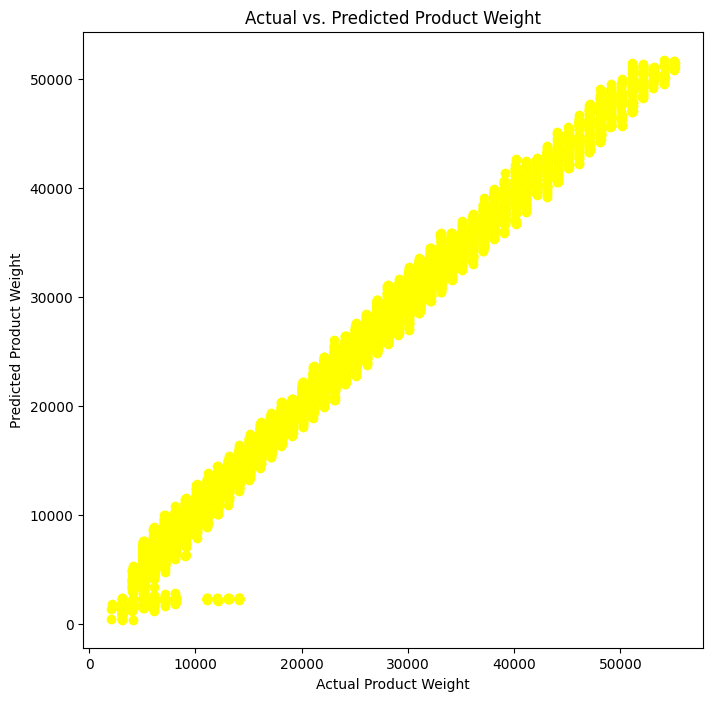

In [55]:

plt.figure(figsize=(8,8))
plt.scatter(y_train, lr_train_preds,color = 'yellow')
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Actual vs. Predicted Product Weight")
plt.show()